<div style="background-color: #add8e6; padding: 10px; height: 70px; border-radius: 15px;">
    <div style="font-family: 'Georgia', serif; font-size: 20px; padding: 10px; text-align: right; position: absolute; right: 20px;">
        Mohammad Idrees Bhat <br>
        <span style="font-family: 'Arial', sans-serif;font-size: 12px; color: #0a0a0a;">Tech Skills Trainer | AI/ML Consultant</span> <!--- Mohammad Idrees Bhat | Tech Skills Trainer | AI/ML Consultant --->
    </div>
</div>

<!--- Mohammad Idrees Bhat | Tech Skills Trainer | AI/ML Consultant --->

<div style="background-color: #002147; padding: 10px; text-align: center; color: white; font-size: 32px; font-family: 'Arial', sans-serif;">
    Advanced Time Series Techniques <br>
    <h3 style="text-align: center; color: white; font-size: 15px; font-family: 'Arial', sans-serif;">Applying LSTM for time series prediction</h3>
</div>

<div style="background-color: white; color: black; padding: 10px;">
    <h4><b>AGENDA</b> <p><p>
1.  Review of Time Series and Forecasting Techniques <p><p> 
2.  Introduction to Deep Learning in Time Series Forecasting <p>
3.  Long Short-Term Memory (LSTM) Networks for Time Series <p>
4.  Real-Life Project Implementaion: Time Series Forecasting with LSTM (Optional/Advanced) <p>  
</h4> </div>

<!-- Link the Montserrat font -->
<link href="https://fonts.googleapis.com/css2?family=Montserrat:wght@700&display=swap" rel="stylesheet">

<!-- Main div with centered content and a flexible box size, no scroll bar -->
<div style="background-color: #baf733; min-height: 100px; width: 100%; display: flex; justify-content: center; align-items: center; position: relative; padding: 20px; box-sizing: border-box; font-family: 'Montserrat', sans-serif; font-weight: 700; font-size: 20px; border-radius: 15px;">
    <div style="position: absolute; top: 10px; right: 10px; padding: 5px 10px; font-size: 14px; color: rgba(0, 0, 0, 0.05); border-radius: 10px;">Mohammad Idrees Bhat</div>
    <!-- Fill the below text with question -->
    <!-- Fill the below text with question -->
    Be kind to someone today!
    <!-- Fill the above text with question -->
    <!-- Fill the above text with question -->

</div>

<div style="background-color: lightgreen; color: black; padding: 4px;">
    <h3>1. Review of Time Series and Forecasting Techniques 
</h3> </div>

**1. ARIMA (AutoRegressive Integrated Moving Average):**
- **Purpose:** Models time series data with trends and seasonality.
- **Key Components:**
    - **AR (AutoRegressive):** Relies on past values.
    - **I (Integrated):** Differencing to make data stationary.
    - **MA (Moving Average):** Models residuals from past values.

- **When to Use:** For univariate time series with clear patterns and no irregular shocks.

**2. Exponential Smoothing:**
- **Purpose:** Models short-term trends and seasonality.
- **Types:**
    - **Simple Exponential Smoothing (SES):** For non-trending series.
    - **Holt’s Linear Trend Method** Accounts for trends.
    - **Holt-Winters Seasonal Method:** Adds seasonality handling.

- **When to Use:** When the data has a consistent pattern over time.

**3. Time Series Decomposition:**
- **Purpose:** Breaks down time series into:
    - **Trend:** Long-term movement.
    - **Seasonal:** Repeating patterns.
    - **Residual:** Irregular fluctuations.
- **When to Use:** To understand and visualize different components before modeling.

---

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.arima.model import ARIMA

In [12]:
# Step 1: Load the dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv"

data = pd.read_csv(url, parse_dates=['Month'], index_col='Month')

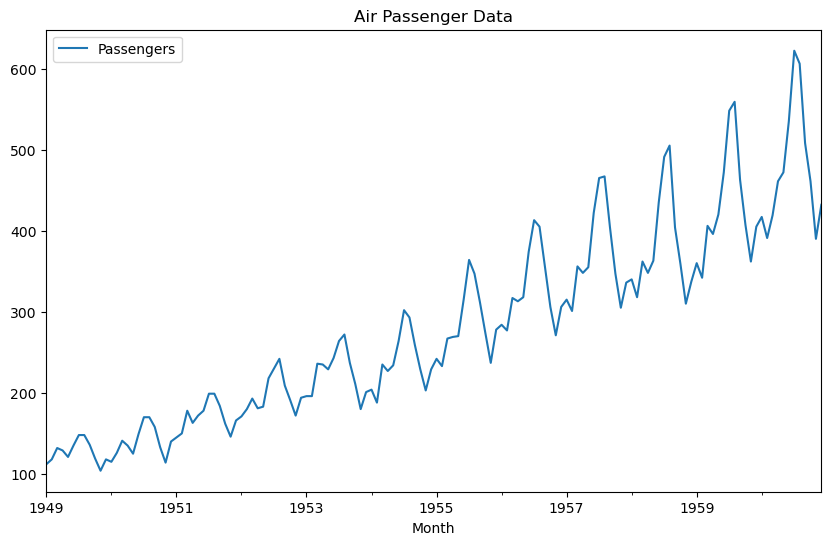

In [13]:
# Step 2: Visualize the original data
data.plot(title="Air Passenger Data", figsize=(10, 6))
plt.show()

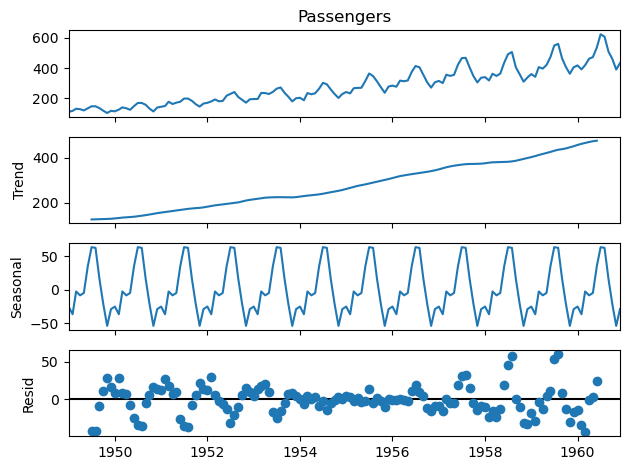

In [14]:
# Step 3: Perform time series decomposition to extract trend, seasonality, and residuals
result = seasonal_decompose(data['Passengers'], model='additive')
result.plot()
plt.show()

In [15]:
# Step 4: Apply the ARIMA model for forecasting
# Define ARIMA parameters (p, d, q)
model_arima = ARIMA(data['Passengers'], order=(4, 1, 1))

# Fit the model
arima_result = model_arima.fit()

# Generate predictions using ARIMA
data['ARIMA_Predictions'] = arima_result.predict(start=1, end=len(data), dynamic=False)

# Forecast 12 months into the future
forecast_arima = arima_result.get_forecast(steps=12)
forecast_arima_index = pd.date_range(data.index[-1], periods=12, freq='MS')
forecast_arima_values = forecast_arima.predicted_mean
forecast_arima_ci = forecast_arima.conf_int()



C:\Users\devid\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\devid\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\devid\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [16]:
# Step 5: Apply Exponential Smoothing for forecasting
# Define the model with trend and seasonality
model_exp = ExponentialSmoothing(data['Passengers'], 
                                 trend='additive', 
                                 seasonal='additive', 
                                 seasonal_periods=12)

# Fit the model
exp_result = model_exp.fit()

# Generate fitted values for Exponential Smoothing
data['Exp_Smoothing'] = exp_result.fittedvalues

# Forecast 12 months into the future
forecast_exp = exp_result.forecast(steps=12)


C:\Users\devid\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


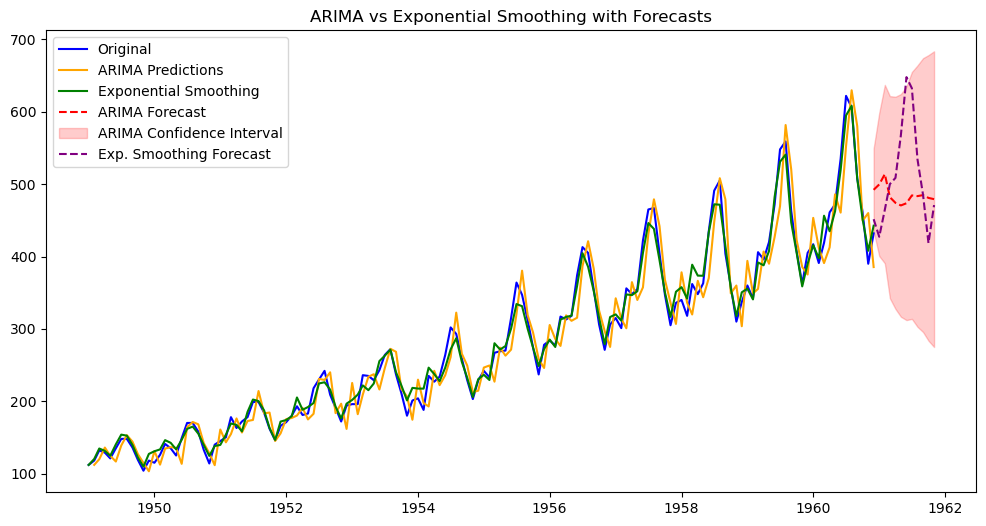

In [17]:
# Step 6: Visualize and compare predictions and forecasts
plt.figure(figsize=(12, 6))
plt.plot(data['Passengers'], label="Original", color='blue')  # Original data
plt.plot(data['ARIMA_Predictions'], label="ARIMA Predictions", color='orange')  # ARIMA predictions
plt.plot(data['Exp_Smoothing'], label="Exponential Smoothing", color='green')  # Exp. smoothing predictions

# Add ARIMA forecast
plt.plot(forecast_arima_index, forecast_arima_values, label="ARIMA Forecast", color='red', linestyle='dashed')
plt.fill_between(forecast_arima_index, 
                 forecast_arima_ci.iloc[:, 0], 
                 forecast_arima_ci.iloc[:, 1], 
                 color='red', alpha=0.2, label="ARIMA Confidence Interval")

# Add Exponential Smoothing forecast
plt.plot(forecast_arima_index, forecast_exp, label="Exp. Smoothing Forecast", color='purple', linestyle='dashed')

plt.legend()
plt.title("ARIMA vs Exponential Smoothing with Forecasts")
plt.show()

In [124]:
# manually making predictions

# Combine ARIMA and Exponential Smoothing forecasts into a DataFrame
forecast_df = pd.DataFrame({
    'Date': forecast_arima_index,
    'ARIMA_Forecast': forecast_arima_values,
    'Exp_Smoothing_Forecast': forecast_exp
}).set_index('Date')

print(f"Forecast range: {forecast_arima_index.min().date()} to {forecast_arima_index.max().date()}")


Forecast range: 1960-12-01 to 1961-11-01


In [126]:
# Function to get the forecast for a specific date
def get_forecast(date):
    date = pd.to_datetime(date)  # Ensure the input is in datetime format
    if date in forecast_df.index:
        result = forecast_df.loc[date]
        return f"Forecast for {date.date()}:\nARIMA: {result['ARIMA_Forecast']:.2f}, Exponential Smoothing: {result['Exp_Smoothing_Forecast']:.2f}"
    else:
        return "Date not in forecast range. Please provide a valid date within the forecast period."

In [134]:
# Example: Get forecast for a specific date
user_date = input("Enter a date (YYYY-MM-DD) to get the forecast: ")
print(get_forecast(user_date))

Enter a date (YYYY-MM-DD) to get the forecast:  1961-05-01


Forecast for 1961-05-01:
ARIMA: 470.58, Exponential Smoothing: 567.71


---

To use a **SARIMA (Seasonal ARIMA)** model, you need to replace the LSTM-based modeling with SARIMA functionality.

In [23]:
# Step 1: Load the dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv"

data = pd.read_csv(url, parse_dates=['Month'], index_col='Month')

C:\Users\devid\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\devid\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\devid\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Mean Squared Error: 449.001679974285


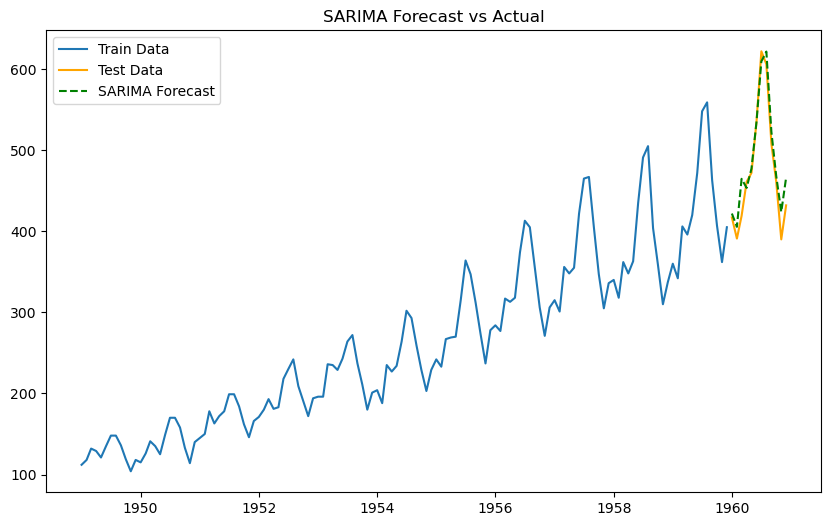

In [24]:
# Import necessary libraries
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Ensure your 'Month' column is in the correct datetime format and set as index
# Data already has 'Month' as index, so no further modification needed here

# Step 1: Split the data into train and test
train_data = data.iloc[:-12]  # Train on all data except the last 12 months
test_data = data.iloc[-12:]   # Use the last 12 months for testing

# Step 2: Fit the SARIMA model to the training data
# Set the order for the SARIMA model (p, d, q) and seasonal order (P, D, Q, S)
order = (1, 1, 1)  # (p, d, q) values, change if needed based on model tuning
seasonal_order = (1, 1, 1, 12)  # (P, D, Q, S) for yearly seasonality

sarima_model = SARIMAX(train_data['Passengers'], order=order, seasonal_order=seasonal_order)
sarima_fit = sarima_model.fit(disp=False)  # Fit the model, suppress output

# Step 3: Forecast for the next 12 months (test data length)
predicted_sarima = sarima_fit.forecast(steps=len(test_data))

# Step 4: Evaluate the model using Mean Squared Error
mse = mean_squared_error(test_data['Passengers'], predicted_sarima)
print(f"Mean Squared Error: {mse}")

# Step 5: Plot the predictions vs actual data
plt.figure(figsize=(10, 6))
plt.plot(train_data.index, train_data['Passengers'], label='Train Data')
plt.plot(test_data.index, test_data['Passengers'], label='Test Data', color='orange')
plt.plot(test_data.index, predicted_sarima, label='SARIMA Forecast', color='green', linestyle='--')
plt.legend()
plt.title('SARIMA Forecast vs Actual')
plt.show()


### **Advanced Time Series Techniques**

<div style="background-color: lightgreen; color: black; padding: 4px;">
    <h3>2. Introduction to Deep Learning in Time Series Forecasting
</h3> </div>

Deep learning techniques have gained popularity for time series forecasting because of their ability to model complex, non-linear relationships in data that traditional statistical methods struggle to capture.

**Why Deep Learning?**

1. **Handles Non-Linearity:**
   - Traditional methods (e.g., ARIMA, Exponential Smoothing) assume linear relationships or specific patterns.
   - Deep learning models, such as LSTMs and GRUs, can capture complex, non-linear dependencies.

2. **Captures Long-Term Dependencies:**
   - Deep learning models, especially recurrent neural networks (RNNs), can process sequential data and remember information over longer periods compared to traditional methods.

3. **Automated Feature Extraction:**
   - Models like LSTMs automatically extract patterns, trends, and seasonality without the need for manual feature engineering.

4. **Scalability:**
   - Deep learning models work well on large datasets, making them suitable for time series data with high frequency or multiple variables.

5. **Flexibility with Multivariate Data:**
   - They can handle multiple input features (e.g., time series with multiple variables) to predict future values, unlike some traditional univariate-focused methods.

---
---

Deep learning offers several architectures tailored for sequential data:

**1. Recurrent Neural Networks (RNNs)**
   - **Basic building blocks for sequence modeling.**
   - Process data step by step, passing information through hidden states.
   - **Limitations:** Struggles with long sequences due to vanishing/exploding gradients.

**2. Long Short-Term Memory Networks (LSTMs)**
   - A special type of RNN designed to remember long-term dependencies.
   - Composed of cells with **three gates**:
     - **Forget Gate**: Decides what information to discard.
     - **Input Gate**: Decides what new information to store.
     - **Output Gate**: Determines the final output.
   - **Advantages:** Commonly used for time series forecasting due to their effectiveness with sequential data.

**3. Gated Recurrent Units (GRUs)**
   - A simpler alternative to LSTMs, with fewer gates (update and reset gates).
   - **Advantages:** Comparable performance to LSTMs but computationally faster.

<div style="background-color: lightgreen; color: black; padding: 4px;">
    <h3>3. Long Short-Term Memory (LSTM) Networks for Time Series
</h3> </div>

[Learn More about LSTM - Analytics Vidya](https://www.analyticsvidhya.com/blog/2021/03/introduction-to-long-short-term-memory-lstm/)

[Revise LSTM quickly - GeeksForGeeks](https://www.geeksforgeeks.org/deep-learning-introduction-to-long-short-term-memory/)

**LSTM networks** are a specialized form of Recurrent Neural Networks (RNNs) designed to handle long-term dependencies in sequential data, making them highly effective for time series forecasting.

**Recurrent Neural Networks (RNN) and LSTM Architecture**

- **RNNs:** Neural networks designed to process sequences of data by maintaining hidden states through time.

- **LSTM (Long Short-Term Memory):** A more advanced type of RNN that addresses the **vanishing gradient problem**, allowing the network to learn long-term dependencies.
  - LSTMs are capable of maintaining information for longer periods, making them suitable for time series data with long-term dependencies.


**LSTM Units: Forget, Input, and Output Gates**


- **Forget Gate:** Decides what information should be discarded from the cell state.
- **Input Gate:** Decides what new information will be added to the cell state.
- **Output Gate:** Determines the final output based on the cell state and previous hidden state.


![](https://cdn.analyticsvidhya.com/wp-content/uploads/2024/08/Screenshot-from-2021-03-16-13-41-03.webp)

---

**Data Preparation for LSTM**

1. **Reshaping Time Series Data:**
   - LSTMs expect the input data to be in a 3D array format: **[samples, time steps, features]**.
   - **Feature Scaling:** Time series data is usually normalized or scaled to a range (e.g., MinMaxScaler or StandardScaler) to improve training convergence.

2. **Sequence Formatting:**
   - Time series data needs to be split into input sequences (X) and corresponding output (Y). 
   - This involves creating sliding windows over the data to define sequences for prediction.

3. **Splitting Data into Training and Test Sets:**
   - Split the dataset into training (e.g., 80%) and test (e.g., 20%) to evaluate the model’s performance on unseen data.

---


<div style="background-color: lightblue; color: black; padding: 4px;">
    <h4> Building an LSTM Model in Python
</h4> </div>

1. **Importing Required Libraries**
First, we need to import the necessary libraries for building the LSTM model.


In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam

**2. Data Preparation for LSTM**

To train an LSTM model, the data needs to be reshaped and scaled. We typically normalize the time series data and convert it into sequences that the LSTM can learn from.

Reshaping the Time Series Data
We will reshape the time series data into a format where each sample consists of a sequence of past observations (features) used to predict future values (target).

In [46]:
# Create a sample dataframe for testing
data = pd.DataFrame({
    'Month': pd.date_range(start='1/1/2000', periods=120, freq='M'),
    'Passengers': np.random.randint(100, 500, size=120)  # Random passenger counts
})

# Set 'Month' as the index
data.set_index('Month', inplace=True)

# Display the first few rows of the dataframe
print(data.head())

            Passengers
Month                 
2000-01-31         188
2000-02-29         270
2000-03-31         236
2000-04-30         447
2000-05-31         480


C:\Users\devid\AppData\Local\Temp\ipykernel_16856\677951534.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  'Month': pd.date_range(start='1/1/2000', periods=120, freq='M'),


In [47]:
# Scale the data using MinMaxScaler (scales between 0 and 1)
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data['Passengers'].values.reshape(-1, 1))

# Create a function to prepare the data into sequences
def create_dataset(data, time_step=1):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        X.append(data[i:(i + time_step), 0])
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

# Define the time step (number of previous time steps to consider for each prediction)
time_step = 12

# Prepare the data
X, y = create_dataset(scaled_data, time_step)

# Reshape X to be in the shape [samples, time steps, features] for LSTM input
X = X.reshape(X.shape[0], X.shape[1], 1)

**3. Splitting Data into Training and Test Sets**

We will split the dataset into training and test sets, typically using the first 80% of the data for training and the remaining 20% for testing.

In [49]:
# Split the data into training and testing sets (80% training, 20% testing)
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Check the shapes of the prepared data
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(85, 12, 1) (22, 12, 1) (85,) (22,)


**4. Building the LSTM Model**

Now we can build the LSTM model using Keras. We'll use a simple architecture with LSTM layers followed by dense layers to make predictions.

In [51]:
# Initialize the model
model = Sequential()

# Add the LSTM layer with 50 units and return sequences for the next LSTM layer
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))

# Add a Dropout layer to prevent overfitting
model.add(Dropout(0.2))

# Add another LSTM layer
model.add(LSTM(units=50, return_sequences=False))

# Add another Dropout layer
model.add(Dropout(0.2))

# Add the output layer with a single neuron for regression
model.add(Dense(units=1))

# Compile the model using Adam optimizer and MSE (Mean Squared Error) loss function
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')


C:\Users\devid\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


**5. Hyperparameter Tuning**

**Number of Layers:** You can experiment with adding or removing layers based on the complexity of your data.

**Units:** The number of units in the LSTM layer. A common choice is between 50 and 100 units.

**Dropout Rate:** Dropout is used to avoid overfitting. A typical dropout rate is between 0.2 and 0.5.

**6. Training the Model**

We will now train the model using the training data.

In [54]:
# Train the model
model.fit(X, y, epochs=20, batch_size=32)

Epoch 1/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.3596
Epoch 2/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2126 
Epoch 3/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0919 
Epoch 4/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1223 
Epoch 5/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0985 
Epoch 6/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1019 
Epoch 7/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0958 
Epoch 8/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1012 
Epoch 9/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0935 
Epoch 10/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1023 
Epoch 11/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0975 
Epoch 12/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0953 
Epoch 13/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0891 
Epoch 14/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0926 
Epoch 15/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0885 
Epoch 16/20
4/4 ━━━━━━━━━━━━━━━━━━━

**7. Model Evaluation**

After training, we evaluate the model using performance metrics such as RMSE (Root Mean Squared Error) and MAE (Mean Absolute Error):

In [56]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Predictions
predicted = model.predict(X)

# Evaluate the model
rmse = np.sqrt(mean_squared_error(y, predicted))
mae = mean_absolute_error(y, predicted)

print(f"RMSE: {rmse}")
print(f"MAE: {mae}")


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 104ms/step
RMSE: 0.29431677774261483
MAE: 0.2478791293778001


- RMSE gives an idea of how much the model's predictions deviate from the actual values. A lower RMSE indicates better model performance.

- MAE measures the average magnitude of errors in a set of predictions, without considering their direction.

**8. Future Forecasting**

Once the model is trained, it can be used to forecast future values. To predict future values, ensure you have the last sequence of data points and reshape them appropriately for the LSTM model:

In [59]:
# Define sequence length for LSTM
sequence_length = 60 # Number of previous days the model looks at

# Predicting the next value (after the last available data)
future_sequence = scaled_data[-sequence_length:]
future_sequence = future_sequence.reshape(1, sequence_length, 1)
predicted_value = model.predict(future_sequence)
predicted_value = scaler.inverse_transform(predicted_value)  # Rescale to original scale

print(f"Predicted value for the next day: {predicted_value}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 351ms/step
Predicted value for the next day: [[340.91846]]


**Custom number of days to forecast**

In [61]:
# Number of days you want to forecast
forecast_days = 30  # Example: forecast next 30 days

# Prepare the last available sequence for prediction
last_sequence = scaled_data[-sequence_length:]
last_sequence = last_sequence.reshape(1, sequence_length, 1)

# Create a list to store the predictions
predicted_values = []

# Predict the next `forecast_days` days
for i in range(forecast_days):
    # Make the prediction
    next_day_prediction = model.predict(last_sequence)
    
    # Rescale the prediction back to original scale
    next_day_prediction = scaler.inverse_transform(next_day_prediction)
    
    # Store the predicted value
    predicted_values.append(next_day_prediction[0][0])
    
    # Update the sequence to include the new prediction (for the next day's prediction)
    last_sequence = np.append(last_sequence[:, 1:, :], next_day_prediction.reshape(1, 1, 1), axis=1)

# Convert the predictions into a DataFrame for easier viewing
predicted_dates = pd.date_range(data.index[-1] + pd.Timedelta(days=1), periods=forecast_days, freq='D')
predictions30_df = pd.DataFrame(predicted_values, index=predicted_dates, columns=['Predicted'])



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━

In [62]:
predictions30_df.head()

,Predicted
2010-01-01,340.918457
2010-01-02,397.652832
2010-01-03,446.061432
2010-01-04,481.928040
2010-01-05,508.242523


<div style="background-color: lightgreen; color: black; padding: 4px;">
    <h3>4. Real-Life Project Implementaion: Time Series Forecasting with LSTM (Optional/Advanced)
</h3> </div>

We’ll build an LSTM model to predict future stock closing prices for a specific number of days. This project will involve:

Training the model on historical data.
Generating predictions for unseen future dates.
Visualizing results to see how the model forecasts the trend.

In [65]:
#pip install yfinance

In [66]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

In [67]:
# Step 1: Fetch the data
stock_data = yf.download("AAPL", start="2015-01-01", end="2023-01-01", interval="1d")
data = stock_data[['Close']]
data.dropna(inplace=True)

[*********************100%***********************]  1 of 1 completed
C:\Users\devid\AppData\Local\Temp\ipykernel_16856\3107118480.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace=True)


In [68]:
# Step 2: Preprocess the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Create sequences for training
sequence_length = 60
X, y = [], []
for i in range(sequence_length, len(scaled_data)):
    X.append(scaled_data[i-sequence_length:i])
    y.append(scaled_data[i])

X, y = np.array(X), np.array(y)

# Split into training and testing sets
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [69]:
# Step 3: Build the LSTM model
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    LSTM(50),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/20


C:\Users\devid\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


49/49 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0157 - val_loss: 0.0048
Epoch 2/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 4.9707e-04 - val_loss: 0.0016
Epoch 3/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 2.9679e-04 - val_loss: 0.0016
Epoch 4/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 2.7721e-04 - val_loss: 0.0018
Epoch 5/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 2.9200e-04 - val_loss: 0.0020
Epoch 6/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 2.8260e-04 - val_loss: 0.0014
Epoch 7/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 2.6807e-04 - val_loss: 0.0016
Epoch 8/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 2.2902e-04 - val_loss: 0.0017
Epoch 9/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 2.8898e-04 - val_loss: 0.0014
Epoch 10/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 3.4986e-04 - val_loss: 0.0025
Epoch 11/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 3.3810e-04 - val_loss: 0.0015
Epoch 12/20
49/49 ━━━━━━━━━━━━━━━━

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step


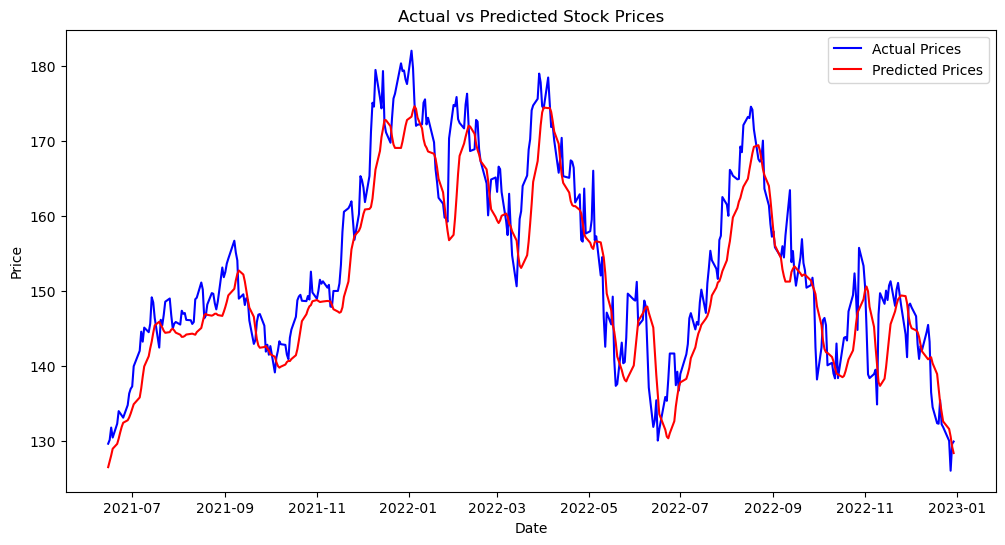

In [70]:
# Step 4: Predict test data and visualize
predicted = model.predict(X_test)
predicted = scaler.inverse_transform(predicted)
y_test_actual = scaler.inverse_transform(y_test)

plt.figure(figsize=(12, 6))
plt.plot(data.index[-len(y_test_actual):], y_test_actual, label="Actual Prices", color='blue')
plt.plot(data.index[-len(predicted):], predicted, label="Predicted Prices", color='red')
plt.xlabel("Date")
plt.ylabel("Price")
plt.title("Actual vs Predicted Stock Prices")
plt.legend()
plt.show()

In [71]:
# Step 5: Forecast future stock prices
forecast_days = 30
last_sequence = scaled_data[-sequence_length:]
future_predictions = []

for _ in range(forecast_days):
    next_day_prediction = model.predict(last_sequence.reshape(1, sequence_length, 1))
    future_predictions.append(next_day_prediction[0][0])
    last_sequence = np.append(last_sequence[1:], next_day_prediction, axis=0)

# Convert predictions back to original scale
future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))

# Create a DataFrame for future predictions
forecast_dates = pd.date_range(data.index[-1] + pd.Timedelta(days=1), periods=forecast_days, freq='D')
forecast_df = pd.DataFrame(future_predictions, index=forecast_dates, columns=['Predicted Price'])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━

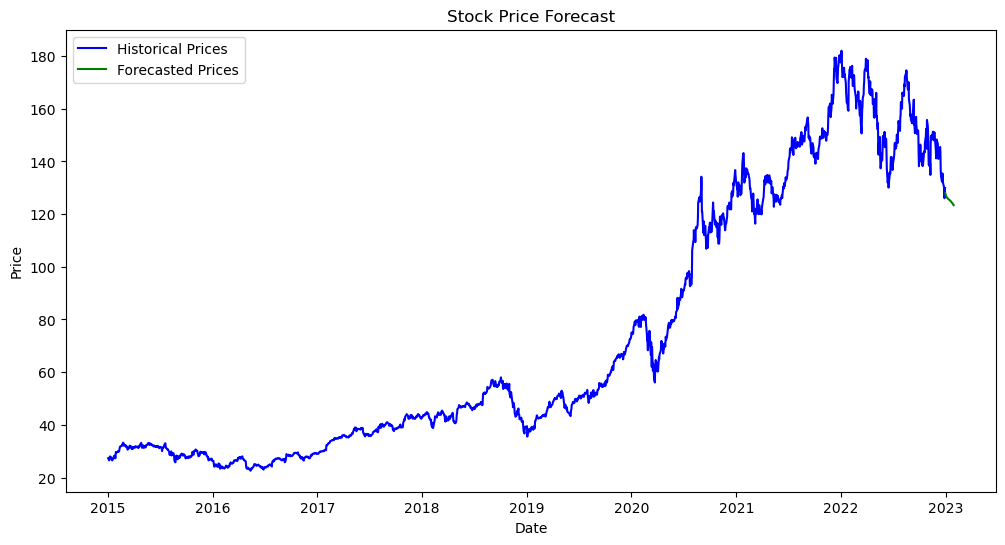

            Predicted Price
2022-12-31       127.930634
2023-01-01       127.513008
2023-01-02       127.166840
2023-01-03       126.877739
2023-01-04       126.634895
2023-01-05       126.429947
2023-01-06       126.256027
2023-01-07       126.107285
2023-01-08       125.978363
2023-01-09       125.864601
2023-01-10       125.761803
2023-01-11       125.666252
2023-01-12       125.574684
2023-01-13       125.484383
2023-01-14       125.392990
2023-01-15       125.298698
2023-01-16       125.200165
2023-01-17       125.096077
2023-01-18       124.985924
2023-01-19       124.869278
2023-01-20       124.745987
2023-01-21       124.616165
2023-01-22       124.479980
2023-01-23       124.337837
2023-01-24       124.190224
2023-01-25       124.037827
2023-01-26       123.881050
2023-01-27       123.720749
2023-01-28       123.557541
2023-01-29       123.392136


In [72]:
# Plot the forecast
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Close'], label="Historical Prices", color='blue')
plt.plot(forecast_df.index, forecast_df['Predicted Price'], label="Forecasted Prices", color='green')
plt.xlabel("Date")
plt.ylabel("Price")
plt.title("Stock Price Forecast")
plt.legend()
plt.show()

# Display forecasted prices
print(forecast_df)


**Let's observe the output better now**

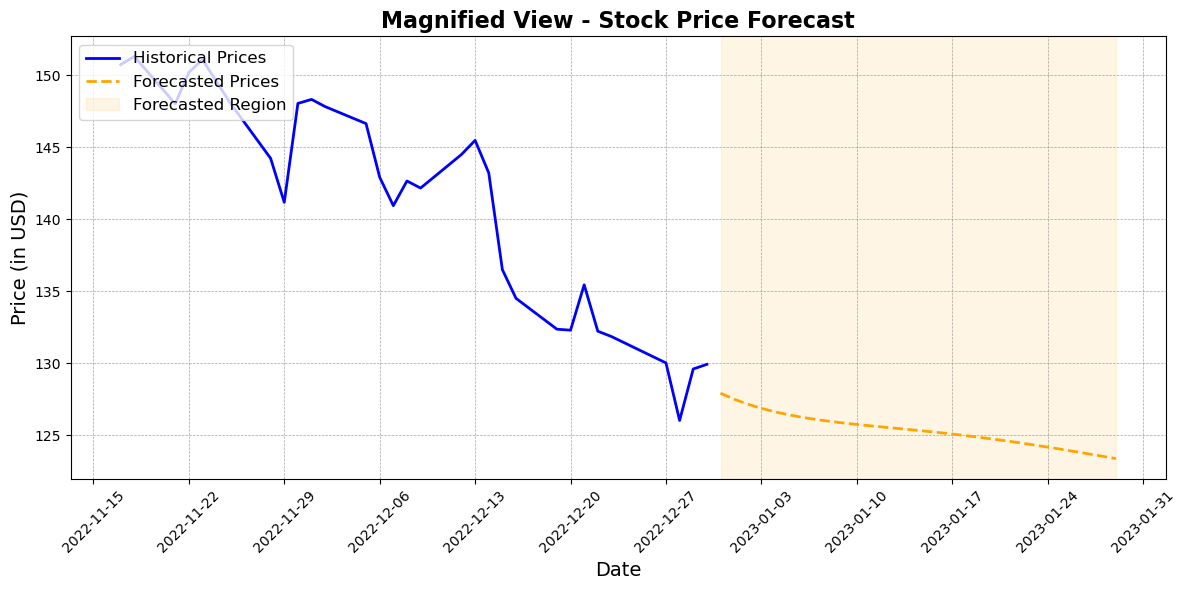

In [74]:
# Zoomed-in Plot: Last Portion of Historical Data + Predictions

import matplotlib.dates as mdates

plt.figure(figsize=(12, 6))

# Select a portion of historical data for context (e.g., last 30 days)
context_days = 30
historical_context = data.iloc[-context_days:]  # Slice the last N days of historical data

# Plot the historical context
plt.plot(historical_context.index, historical_context['Close'], label="Historical Prices", color='blue', linewidth=2)

# Plot the forecasted data
plt.plot(forecast_df.index, forecast_df['Predicted Price'], label="Forecasted Prices", color='orange', linestyle='--', linewidth=2)

# Highlight forecasted area with a shaded region
plt.axvspan(forecast_df.index[0], forecast_df.index[-1], color='orange', alpha=0.1, label="Forecasted Region")

# Add titles and labels
plt.title("Magnified View - Stock Price Forecast", fontsize=16, fontweight='bold')
plt.xlabel("Date", fontsize=14)
plt.ylabel("Price (in USD)", fontsize=14)

# Format x-axis for better readability
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.WeekdayLocator(interval=1))
plt.xticks(rotation=45, fontsize=10)

# Add gridlines for clarity
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)

# Add legend
plt.legend(fontsize=12, loc='upper left')

# Show the plot
plt.tight_layout()
plt.show()


<div style="background-color: lightblue; color: white; padding: 10px; text-align: center;">
    <h1>_________________________________END________________________________
        <!--- Mohammad Idrees Bhat | Tech Skills Trainer | AI/ML Consultant --->
</h1> </div>

<div style="background-color: #002147; color: #fff; padding: 30px; text-align: center;">
    <h1>THANK YOU!
        <!--- Mohammad Idrees Bhat | Tech Skills Trainer | AI/ML Consultant --->
</h1> </div>

<div style="background-color: lightgreen; color: black; padding: 30px;">
    <h4> Live Exercise Solutions
        
</h4> </div>

In [78]:
#solutions

<div class="alert alert-block alert-warning"  padding: 10px; text-align: center;">
    <font size="3"> Programming Interveiw Questions</font>
</div>

1. topic:
    - question

<!--- Mohammad Idrees Bhat | Mohammad Idrees Bhat --->

<h2 style="background-color: #ffe4e1; color: #2f4f4f; padding: 10px; border-radius: 10px; width: 350px; text-align: center; float: right; margin: 20px 0;">
    Mohammad Idrees Bhat<br>
    <span style="font-size: 12px; color: #696969;">
        Tech Skills Trainer | AI/ML Consultant
    </span>
</h2>

<!--- Mohammad Idrees Bhat | Tech Skills Trainer | AI/ML Consultant --->